<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Advanced Data Science<br/>Asignatura Reinforcement Learning</center>

# Challenge S2: Practicando con MDP y Dinamic Programming


El principal **objetivo** de esta práctica es manejarnos con los conceptos de:
* **recompensa inmediata** $R$
* **recomensa cumulativa** $G$
* **política** de un agente $\pi(s|a)$
* **función de valor** $v_\pi(s)$


y aplicar las relaciones entre ellos.

En el primer lugar, vamos a suponer que estamos observando las acciones de un agente en un entorno, con lo que tras cada episodio obtenemos la serie de estados $s_t$, acciones $a_t$ y recompensas $r_t$ que el agente ha ido recibiendo.

**Nota:** Para aclarar la notación, la recomensa a tiempo $t$ viene dada tras actuar con $a_{t-1}$ en el estado $s_{t-1}$, con lo que la primera recompensa viene dada por $r_1$. Para hacer las estructuras de datos homogéneas, establecemos que $r_0=0$.

Un ejemplo de un episodio, que termina en $t=5$ es:

```
{(s,a,r)} = ((1,'up',0), (2,'up',-1), (3,'down',-1), (2,'up',1), (3,'up',-1), (4,None,10))
```

También puede darse que sea un proceso infinito, con lo que no habrá un estado final, y el episodio se haya truncado.

## Ejercicio 1. Calcular recompensa cumulativa

El primer ejercicio consiste en, dado un episodio de la forma indicada anteriormente, extraer la secuencia de recomensas cumulativas. 

Dada la definición:
$$
G_t \equiv R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + \cdots = R_t + \gamma G_{t+1}
$$

Evalúa la función para distintos valores de `gamma`, incluyendo los casos límite de 0 y 1.

In [1]:
episodio = ((1,'up',0), (2,'up',-1), (3,'down',-1), (2,'up',1), (3,'up',-1), (4,None,10))

**Tip**: Puedes buscar en Google: Por qué la función de la recompensa descontada se invierte? **Nota**: Si usas este recurso, explica en castellano el porqué.

**Respuesta:** La función de recompensa descontada tiene que agregar todas las recompensas que se van a recoger en todos los pasos de tiempo hasta el estado final multiplicadas en cada paso por el gamma. Como la recopensa del estado actual depende del valor de las recompensas de los estados futuros, entonces es necesario empezar este cálculo de estado más lejano en el futuro que es el estado final y luego de que se calula la recompensa de este estado último , se ira agregando a la recompensa del penúltimo previa multiplicación por gamma, y así sucesivamente hasta calcular la recompensa del estado actual.

**Tip:** He realizado dos funciones que calculan la reconpensa acumulativa, sirviendome de distintas estrategias para realizar este recorrido inverso. 

In [2]:
def get_cumulative_reward_2(episode, gamma=.9):
    cumulative_rewards = [0]*len(episode)
        
    # ESCRIBE AQUÍ TU CÓDIGO
    value_state=0
    for i in reversed(range(0, len(episode))):
        value_state = value_state * gamma + episode[i][2]
        cumulative_rewards[i] = value_state
    return cumulative_rewards

cumul_0 = get_cumulative_reward_2(episodio, gamma=0)
cumul_09 = get_cumulative_reward_2(episodio, gamma=.9)
cumul_1 = get_cumulative_reward_2(episodio, gamma=1)
print(cumul_0)
print(cumul_09)
print(cumul_1)

[0, -1, -1, 1, -1, 10]
[4.2678, 4.742, 6.38, 8.2, 8.0, 10.0]
[8, 8, 9, 10, 9, 10]


In [3]:
def get_cumulative_reward(episode, gamma=.9):
    cumulative_rewards = [0]*len(episode)
       
    # ESCRIBE AQUÍ TU CÓDIGO
    episode = episodio[::-1]
    indice = 0
   
    for t in episode:
        if (indice==0):
            cumulative_rewards[indice]=t[2]
        else:
            cumulative_rewards[indice]=t[2]+((gamma*cumulative_rewards[indice-1]))
        indice+=1
        
    return cumulative_rewards[::-1]


cumul_0 = get_cumulative_reward(episodio, gamma=0)
cumul_09 = get_cumulative_reward(episodio, gamma=.9)
cumul_1 = get_cumulative_reward(episodio, gamma=1)
print(cumul_0)
print(cumul_09)
print(cumul_1)

[0, -1, -1, 1, -1, 10]
[4.2678, 4.742, 6.38, 8.2, 8.0, 10]
[8, 8, 9, 10, 9, 10]


In [4]:
# CHECKS
assert [el[2] for el in episodio] == cumul_0
assert cumul_0[-1] == 10
assert cumul_09[-1] == 10
assert cumul_1[-1] == 10

## Ejercicio 2. Entornos aleatorios

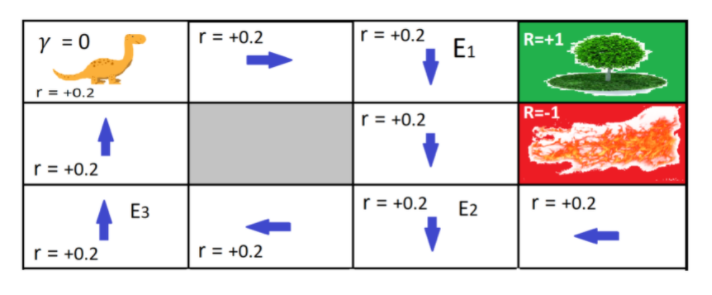

**Cuestión:** En la representación anterior, si gamma = 0.9 según tu intuición ¿Tendría el mismo valor estar en el estado E1, E2 o E3?¿Por qué? 

**Respuesta:** No tendrían el mismo valor. En este caso estamos empezando a tener en cuenta gamma=0,9 y contamos con las recompensas a futuro, tenemos que agregar las recompensas de los estados futuros, tantas veces como paso debamos dar para llegar al obetivo multipiclando por el factor gamma cada paso. 

A diferencia de la representación que teniendo un gamma=0 si sería iguales los estados ya que es un sistema miope y solo tiene en cuenta las recompensa inmediata, la futura queda anulada al multiplicarse por 0.

## Ejercicio 3. Entornos aleatorios

**Cuestión:** Según la figura inferior, si Mike estuviese en un lago helado (entorno estocástico) crees que sería un agente totalmente aleatorio o puede ser un agente "entrenado", es decir, ya ha aprendido una política?¿Por qué?. 

**Respuesta:** Pese a que en el movimiento entran en juego una serie de probabilidades para terminar en un estado u otro, entiendo que puede llegar a ser una agente "entrenado" ya que tal como se indica en el worksheet, si el  agente conoce los valores de los estados entonces automáticamente obtenemos su política óptima ya que conocemos para todos los estados cual es la acción que maximiza la recompensa.

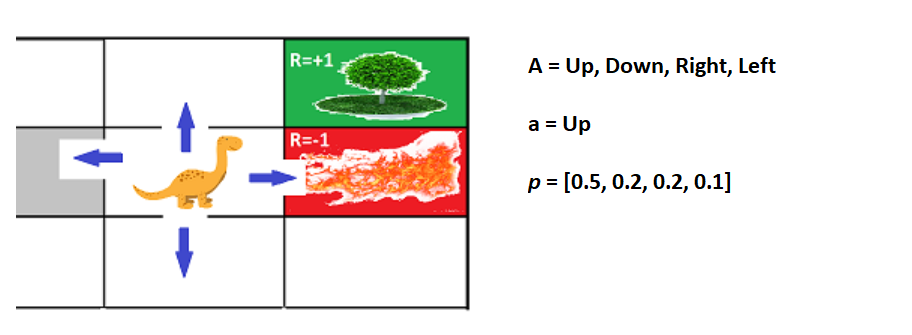

## Ejercicio 4. Estimar la función de valor      

Calcula el valor de los estados S1 y S2.

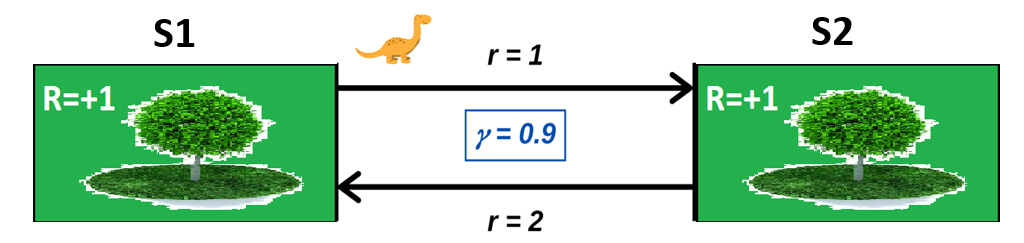

In [5]:
V1 = 0 #Inicializar el Valor de estado 1 a 0
V2 = 0 #Inicializar el Valor de estado 2 a 0
gamma = 0.9 # factor de descuento
r1 = 1 # recompensa transición del estado 1 al estado 2
r2 = 2 # recompensa transición del estado 2 al estado 1

# Ejecutamos la ecuación de Belmman para actualizar V1 y V2
for _ in range(50):
    V1 = r1 + gamma*V2 
    V2 = r2 + gamma*V1

print("V1:", V1)    
print("V2:", V2)    

V1: 14.736391648790796
V2: 15.262752483911717


Con esto termina la parte de este challenge dedicada a trabajar sobre el MDP de ejemplo del Worksheet. A continuación vamos a aplicar los mismos conceptos vistos previamente a un entorno algo más interesante: *Frozen Lake*

## Ejercicio 5. [Frozen Lake](https://gym.openai.com/envs/FrozenLake-v0/)      

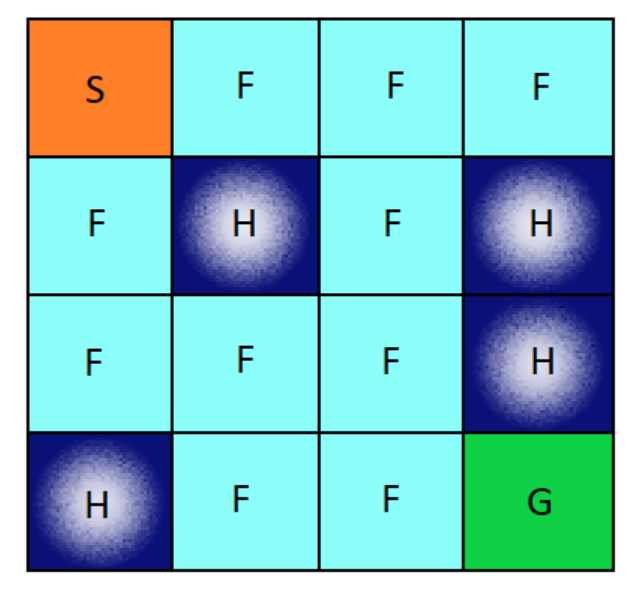

En este ejercicio debes completar el codigo de falta, en algunos casos verás que pone *##YOUR CODE HERE##*, y en otros casos algo asi como *## Número de acciones ##*, en éstos últimos este el valor se obtener del entorno, **NO** se puede **hardcodear** y poner *4* sin más, sino, *env.nS*.

En este famoso entorno controlamos un personaje que se mueve por una cuadrícula. Parte de una casilla de Start (S) y tiene que llegar a un Goal (G) moviéndose a través de la misma con **acciones** [izq, abj, dch, arriba]. La mayoría de casillas de la cuadrícula son andables (F) pero hay otras que son agujeros (H) y nuestro personaje cae al agua. El **episodio** termina cuando se alcanza el Goal o se cae en un agujero. Se recibe una **recompensa** de 1 si se alcanza el objetivo y zero al contrario.

Vamos a importar el entorno y echar un vistazo a su representación relizando 5 acciones aleatorias:

In [6]:
import gym
import numpy as np

In [7]:
ITERATIONS = 5
 
env = gym.make("FrozenLake-v1", is_slippery=False) # is_slippery=False -> Entorno determinista (sin resbalones)
env.reset()
env.render()
for i in range(ITERATIONS):
    random_action = env.action_space.sample()
    new_state, reward, done, info = env.step(random_action)
    env.render()
    if done:
        break
env.close()


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


En primera instancia vamos a calcular los valores estado-acción para todas las posibles acciones de cada estado, después actualizamos la función de valor del estado con el mayor valor estado-acción calculado. Para ello se define la función *value_iterator* que recibe dos parámetros.      

La iteración de valores termina cuando la dfierencia entre el valor actualizado del estado y el valor anterior es relativamente pequeño (1x10-4) o cuando se alcanza el número máximo de iteraciones.


### 1. Cálculo de los pares de valores estado-acción

In [8]:
def value_iterator(env, max_iterations=100000, gamma=0.9):
    stateValue = [0 for i in range( env.nS )] # env.nS -> Número de estados. Lista con los posibles estados que se inicializan con valor cero
    newStateValue = stateValue.copy() # Lista que guarda el nuevo valor de cada estado
    for i in range( max_iterations ):
#         print('Iteration: ',i)
        for state in range( env.nS ): # Iteramos por cada estado.
            action_values = []
            for action in range( env.nA): #env.nA -> Número de acciones posibles
                state_value = 0
                for i in range( len( env.P[state][action])): # env.P es una lista que contiene todos los estados, donde cada estado a su vez contiene un diccionario que mapea todas las acciones posibles del estado al siguiente estado si tomamos esa accion, Probabilidad de ir al estado siguiente, reward, y si el juego termina o no.
                    # Te recomiendo que te imprimas en una celda a parte env.P, para su mejor comprensión#
                    prob, next_state, reward, done = env.P[state][action][i]
                    state_action_value = prob*(reward+gamma*stateValue[next_state]) # Cálculo de del valor estado-acción (fórmula).
                    state_value += state_action_value
                action_values.append( state_value )  # el valor de cada acción
                best_action = np.argmax(np.asarray(action_values))  # elegimos la acción que da el máximo valor
                newStateValue[state] = action_values[best_action] ##YOUR CODE HERE##  # actulizamos el valor para cada estado con el de la mejor acción
#                 print(f'Nuevo estado {newStateValue[state]}')
#                 print(f'Nuevo estado {newStateValue}')
                

        if i > 1000:
            if sum( stateValue ) - sum( newStateValue ) < 1e-04:  # Si la diferencia es menor que el umbral fijado, detenemos el bucle.
                break
                print('Last iteration:', str(i))
        else:
            stateValue = newStateValue.copy()
    return stateValue

In [9]:
env = gym.make( 'FrozenLake-v1', is_slippery=False)
print(env.P[0])
print(env.P)
print(env.nS)
print(env.nA)

{0: [(1.0, 0, 0.0, False)], 1: [(1.0, 4, 0.0, False)], 2: [(1.0, 1, 0.0, False)], 3: [(1.0, 0, 0.0, False)]}
{0: {0: [(1.0, 0, 0.0, False)], 1: [(1.0, 4, 0.0, False)], 2: [(1.0, 1, 0.0, False)], 3: [(1.0, 0, 0.0, False)]}, 1: {0: [(1.0, 0, 0.0, False)], 1: [(1.0, 5, 0.0, True)], 2: [(1.0, 2, 0.0, False)], 3: [(1.0, 1, 0.0, False)]}, 2: {0: [(1.0, 1, 0.0, False)], 1: [(1.0, 6, 0.0, False)], 2: [(1.0, 3, 0.0, False)], 3: [(1.0, 2, 0.0, False)]}, 3: {0: [(1.0, 2, 0.0, False)], 1: [(1.0, 7, 0.0, True)], 2: [(1.0, 3, 0.0, False)], 3: [(1.0, 3, 0.0, False)]}, 4: {0: [(1.0, 4, 0.0, False)], 1: [(1.0, 8, 0.0, False)], 2: [(1.0, 5, 0.0, True)], 3: [(1.0, 0, 0.0, False)]}, 5: {0: [(1.0, 5, 0, True)], 1: [(1.0, 5, 0, True)], 2: [(1.0, 5, 0, True)], 3: [(1.0, 5, 0, True)]}, 6: {0: [(1.0, 5, 0.0, True)], 1: [(1.0, 10, 0.0, False)], 2: [(1.0, 7, 0.0, True)], 3: [(1.0, 2, 0.0, False)]}, 7: {0: [(1.0, 7, 0, True)], 1: [(1.0, 7, 0, True)], 2: [(1.0, 7, 0, True)], 3: [(1.0, 7, 0, True)]}, 8: {0: [(1.0, 

### 2. Obteniendo la política a partir del valor del estado.

Ahora que ya hemos calculado la función de valor para todos los estados, el siguiente paso será extraer la política a partir de la función de valor. Lo haremos de una forma similar, para cada estado concreto, se calcula el par de valor estado-acción de todas las acciones posibles en ese estado y se elige la acción con el mayor valor estado-acción.

Completa la función *get_policiy*


In [10]:
def get_policy(env,stateValue, gamma=0.9):
  policy = [0 for i in range(env.nS)] # Lista de longitud número de estados inicializada a cero.
  for state in range(env.nS):## Número de estados ##): 
    action_values = []
    for action in range(env.nA):## Número de acciones ##):
      action_value = 0
      for i in range(len(env.P[state][action])):
        prob, next_state, r, _ =  env.P[state][action][i]## acción posible para cada estado ##
        action_value += prob*(r+gamma*stateValue[next_state]) ## Valor de la acción ##
      action_values.append(action_value)
    best_action = np.argmax(np.asarray(action_values))##YOUR CODE HERE##  # elegimos la acción que da el máximo valor
    policy[state] = best_action##YOUR CODE HERE## # Actualizamos la política con la mejor acción.
  return policy 

### 3. ¿Objetivo o agujero?

Finalmente, ahora que tenemos la política vamos a seguirla y comprobaremos si el agente alcanza el objetivo o cáe por el agujero.      

Definimos la función *get_score_and_best_path* que probaremos hasta 1000 intentos en caso del entorno. Está función nos devuelve el mejor recorrido llevado a cabo.


In [11]:
def get_score_and_best_path(env, policy, episodes=1000):
    misses = 0
    steps_list = []
    actions_walked = []
    for episode in range(episodes):## número de episodios ##:
        observation =  env.reset()## Estado inicial##
        action_list = []
        steps = 0
        while True:

            action = policy[observation]##acción de la política para cada estado u observación## 
            observation, reward, done, _ = env.step(action)## acción ##)
            action_list.append(action)
            steps += 1
            if done and reward == 1:## YOUR CODE HERE##:  # Si el episodio ha llegado al final y ha conseguido el objetivo
                print('You have got the Frisbee after {} steps'.format(steps))
                steps_list.append( steps )
                actions_walked.append(action_list)
                break
            elif done and reward == 0:## YOUR CODE HERE##: #Si el episodio ha llegado al final y ha caído por un agujero
                print("You fell in a hole!")
                misses += 1
                break

    print( '----------------------------------------------' )
    print( 'You took an average of {:.0f} steps to get the frisbee'.format( np.mean( steps_list ) ) )
    print( 'And you fell in the hole {:.2f} % of the times'.format( (misses / episodes) * 100 ) )
    print( '----------------------------------------------' )

    best_way = actions_walked[0] 
    for i in actions_walked:
        if len(i)<len(best_way): #Elegimos la iteracción con el menor número de pasos
            best_way = i
        else:
            pass

    return best_way

### 4. Muestra la ruta

In [12]:
def show_path(best_way):
    
    print('Number of steps:', str(len(best_way)))
    print("Best way:", str(best_way))
    
    env.reset()
    env.render()
    
    for i in best_way:
        new_state, reward, done, info = env.step(i)
        env.render()
        if done:
            break
    env.close()

### 5. Entrenando al agente

In [13]:
env = gym.make('FrozenLake8x8-v1', is_slippery=False) # is_slippery=True (default) -> Entorno estocástico
## YOUR CODE HERE ## # Inicializamos el entorno

observation = env.reset()
previous_observation = observation

stateValues = value_iterator(env,max_iterations=10000)## YOUR CODE HERE ## # Calculamos los valores de estado hasta 100000 iteraciones
policy = get_policy(env, stateValues)## YOUR CODE HERE ## # Obtenemos la política para los valores de estado
print(policy)
print(len(policy))
best_path= get_score_and_best_path(env, policy)## YOUR CODE HERE ## Calculamos el mejor recorrido

# ## YOUR CODE HERE ## # Visualizamos el mejor recorrido llevado a cabo
show_path(best_path)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 3, 0, 1, 0, 1, 2, 2, 3, 0, 2, 2, 2, 0]
64
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You 

You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps


You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps


You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps
You have got the Frisbee after 14 steps


#### Ahora vuelve a entrenar al agente en el entorno estocástico y comenta las diferencias que observes.

In [14]:
env_esto = gym.make('FrozenLake8x8-v1', is_slippery=True) # is_slippery=True (default) -> Entorno estocástico
## YOUR CODE HERE ## # Inicializamos el entorno

observation = env_esto.reset()
previous_observation = observation

stateValues = value_iterator(env_esto)## YOUR CODE HERE ## # Calculamos los valores de estado hasta 100000 iteraciones
policy = get_policy(env_esto, stateValues)## YOUR CODE HERE ## # Obtenemos la política para los valores de estado
print(policy)
print(len(policy))
best_path= get_score_and_best_path(env_esto, policy)## YOUR CODE HERE ## Calculamos el mejor recorrido

## YOUR CODE HERE ## # Visualizamos el mejor recorrido llevado a cabo
show_path(best_path)

[3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 3, 3, 0, 0, 2, 3, 2, 1, 3, 3, 3, 1, 0, 0, 2, 1, 3, 3, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0]
64
You fell in a hole!
You have got the Frisbee after 79 steps
You have got the Frisbee after 39 steps
You have got the Frisbee after 71 steps
You have got the Frisbee after 121 steps
You fell in a hole!
You fell in a hole!
You have got the Frisbee after 41 steps
You have got the Frisbee after 85 steps
You have got the Frisbee after 62 steps
You have got the Frisbee after 59 steps
You have got the Frisbee after 66 steps
You fell in a hole!
You have got the Frisbee after 68 steps
You have got the Frisbee after 78 steps
You have got the Frisbee after 61 steps
You fell in a hole!
You have got the Frisbee after 58 steps
You fell in a hole!
You fell in a hole!
You have got the Frisbee after 194 steps
You have got the Frisbee after 90 steps
You have got the Frisbee after 81 steps
You have got the Frisb

You have got the Frisbee after 59 steps
You have got the Frisbee after 65 steps
You have got the Frisbee after 64 steps
You fell in a hole!
You have got the Frisbee after 106 steps
You have got the Frisbee after 143 steps
You have got the Frisbee after 66 steps
You have got the Frisbee after 74 steps
You fell in a hole!
You fell in a hole!
You have got the Frisbee after 86 steps
You have got the Frisbee after 89 steps
You fell in a hole!
You have got the Frisbee after 151 steps
You have got the Frisbee after 69 steps
You fell in a hole!
You fell in a hole!
You have got the Frisbee after 55 steps
You have got the Frisbee after 69 steps
You have got the Frisbee after 40 steps
You have got the Frisbee after 81 steps
You have got the Frisbee after 94 steps
You fell in a hole!
You have got the Frisbee after 27 steps
You have got the Frisbee after 81 steps
You have got the Frisbee after 80 steps
You have got the Frisbee after 33 steps
You have got the Frisbee after 46 steps
You have got the 

You have got the Frisbee after 44 steps
You have got the Frisbee after 69 steps
You fell in a hole!
You have got the Frisbee after 49 steps
You have got the Frisbee after 38 steps
You have got the Frisbee after 97 steps
You have got the Frisbee after 69 steps
You have got the Frisbee after 80 steps
You fell in a hole!
You fell in a hole!
You fell in a hole!
You fell in a hole!
You have got the Frisbee after 47 steps
You have got the Frisbee after 22 steps
You fell in a hole!
You have got the Frisbee after 79 steps
You have got the Frisbee after 33 steps
You fell in a hole!
You have got the Frisbee after 47 steps
You have got the Frisbee after 121 steps
You fell in a hole!
You fell in a hole!
You have got the Frisbee after 44 steps
You have got the Frisbee after 50 steps
You fell in a hole!
You have got the Frisbee after 97 steps
You have got the Frisbee after 55 steps
You have got the Frisbee after 52 steps
You fell in a hole!
You fell in a hole!
You have got the Frisbee after 103 step

You have got the Frisbee after 45 steps
You have got the Frisbee after 90 steps
You have got the Frisbee after 43 steps
You have got the Frisbee after 113 steps
You have got the Frisbee after 48 steps
You fell in a hole!
You have got the Frisbee after 73 steps
You have got the Frisbee after 89 steps
You have got the Frisbee after 144 steps
You have got the Frisbee after 52 steps
You fell in a hole!
You have got the Frisbee after 88 steps
You fell in a hole!
You have got the Frisbee after 71 steps
You have got the Frisbee after 45 steps
You fell in a hole!
You have got the Frisbee after 94 steps
You have got the Frisbee after 95 steps
You have got the Frisbee after 60 steps
You have got the Frisbee after 43 steps
You have got the Frisbee after 68 steps
You fell in a hole!
You have got the Frisbee after 39 steps
You fell in a hole!
You have got the Frisbee after 27 steps
You have got the Frisbee after 52 steps
You have got the Frisbee after 43 steps
You have got the Frisbee after 51 step

**Respuesta:** Las diferencias que observo entre el entorno estocastico del determinista son:
  * El determinista al existir siempre una opcón y ser la de probabilidad 1, y la mejor, siempre va a conseguir el objetivo. En este caso de las 1000 iteracciones siempre consigue en el objetivo en **14 pasos**.
  * En el estocástico al entrar en juego probabilidades de dar un paso u otro aunque puedan tener mayor probabilidad la transición al estado con mayor valor, siempre habrá posibilidades de dar el paso que le hace "deslizar" y por lo tanto de caer en el hoyo, como sucede el **28,50%** de las ocasiones. Además las veces que se tiene exito siempre se realiza dando más pasos que los 14 que se dan en el entorno determinista, En este caso la media de pasos para tener éxito es de **71 pasos**